<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/3.1_eigen_decomposition/3.1_6_repeatedEvals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
from sympy import *
from mpl_toolkits.mplot3d import Axes3D, art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

---
# Eigenvectors of repeated eigenvalues
---

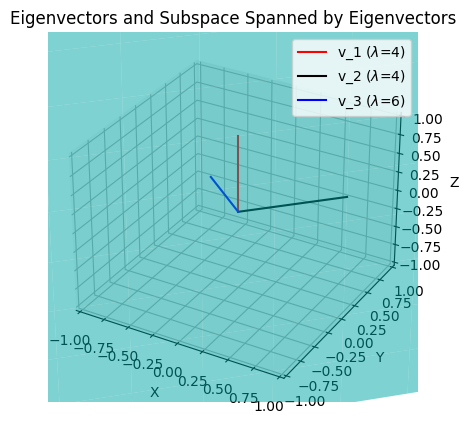

In [12]:
### Note about this cell: you need first to run the following cell,
#   then come back and run this one!
# Define a function to plot a plane spanned by two vectors
def plot_plane(ax, v1, v2, size=1):
    """Plot a plane spanned by two vectors v1 and v2."""
    # Create a grid of points in the plane
    u = np.linspace(-size, size, 10)
    v = np.linspace(-size, size, 10)
    U, V = np.meshgrid(u, v)

    # Define the plane points
    X = v1[0] * U + v2[0] * V
    Y = v1[1] * U + v2[1] * V
    Z = v1[2] * U + v2[2] * V

    # Plot the plane
    ax.plot_surface(X, Y, Z, color='cyan', alpha=0.5)

# Define the matrix A
A = np.array([[ 5, -1,  0],
              [-1,  5,  0],
              [1/3, -1/3, 4]])

# Perform eigendecomposition
D, V = np.linalg.eig(A)

# Sort eigenvalues and eigenvectors
i = np.argsort(D)
D = D[i]
V = V[:, i]

# Plot eigenvectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot eigenvectors of A
ax.plot([0, V[0, 0]], [0, V[1, 0]], [0, V[2, 0]], 'r', label='v_1 ($\lambda$=%g)' % D[0])
ax.plot([0, V[0, 1]], [0, V[1, 1]], [0, V[2, 1]], 'k', label='v_2 ($\lambda$=%g)' % D[1])
ax.plot([0, V[0, 2]], [0, V[1, 2]], [0, V[2, 2]], 'b', label='v_3 ($\lambda$=%g)' % D[2])

# Plot subspace spanned by eigenvectors
if V.shape[1] > 1:
    plot_plane(ax, V[:, 0], V[:, 1], size=3)

# Set plot limits and labels
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend and title
plt.legend()
plt.title("Eigenvectors and Subspace Spanned by Eigenvectors")

plt.show()



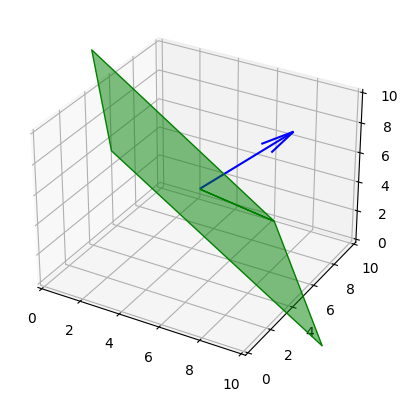

In [13]:

# this code is copy-pasted with some light editing from:
# https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib

# Define a function to plot a vector in 3D space
def plot_vector(ax, orig, v, color='blue'):
    orig = np.array(orig)
    v = np.array(v)
    ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2], color=color)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_zlim(0, 10)

# Define a function to compute the rotation matrix
def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0: return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[0, d[2], -d[1]],
                     [-d[2], 0, d[0]],
                     [d[1], -d[0], 0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

# Define a function to plot a plane in 3D space
def plot_plane(ax, point, normal, size=10, color='g'):
    # Ensure the normal vector is a unit vector
    normal = np.array(normal)
    normal = normal / np.linalg.norm(normal)

    # Create a grid of points on the plane
    d1 = np.array([1, 0, 0])
    d2 = np.array([0, 1, 0])

    # Create two basis vectors that are orthogonal to the normal
    if np.allclose(normal, [1, 0, 0]):
        d1 = np.array([0, 1, 0])
        d2 = np.array([0, 0, 1])
    elif np.allclose(normal, [0, 1, 0]):
        d1 = np.array([1, 0, 0])
        d2 = np.array([0, 0, 1])
    else:
        d1 = np.cross(normal, [1, 0, 0])
        d2 = np.cross(normal, d1)

    d1 = d1 / np.linalg.norm(d1) * size
    d2 = d2 / np.linalg.norm(d2) * size

    p1 = point + d1
    p2 = point + d2
    p3 = point - d1
    p4 = point - d2

    # Compute the vertices of the plane
    vertices = np.array([point, p1, p2, p3, p4, p1])

    # Create a 3D polygon for the plane
    poly = Poly3DCollection([vertices], color=color, alpha=0.5)
    ax.add_collection3d(poly)

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define origin, vector, and normal for plane
o = np.array([5, 5, 5])
v = np.array([3, 3, 3])
n = [0.5, 0.5, 0.5]

# Plot vector and plane
plot_vector(ax, o, v, color='blue')
plot_plane(ax, o, n, size=10, color='green')

plt.show()
